In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# to import the stored data
data = pd.read_csv(r'/content/drive/MyDrive/Research Paper/DATA/REV_Right.csv')

print(data.shape)

data.head()

(300, 18)


,Mean,SD,Variance,Kurtosis,Median,Mode,sum,Skewness,max,min,range,RMS,Impulse Factor,Shape factor,k factor,Std error,count,condition
0,0.012772,0.437381,0.191302,5.342062,0.014769,-0.008984,153.258346,0.032538,4.004789,-2.741048,6.745836,0.003993,0.437549,313.571589,34.259759,1.752293,12000,A
1,0.014417,0.418080,0.174791,4.385488,0.018220,0.094777,173.007315,0.032495,2.631105,-2.109695,4.740800,0.003817,0.418311,182.496682,29.014552,1.100620,12000,A
2,0.014378,0.431913,0.186549,5.562181,0.015721,0.045721,172.537400,0.114481,4.449711,-2.172830,6.622541,0.003943,0.432134,309.478007,30.055013,1.922873,12000,A
3,0.013630,0.427076,0.182394,4.709016,0.021047,0.052514,163.556063,-0.039930,2.915184,-2.337422,5.252606,0.003899,0.427276,213.885129,31.348952,1.245588,12000,A
4,0.012050,0.422334,0.178366,4.681749,0.016703,0.086143,144.594708,-0.096269,2.863474,-2.747296,5.610770,0.003855,0.422488,237.641385,35.062540,1.209784,12000,A


In [4]:
# to check the data imbalance
data['condition '].value_counts()

F    50
A    50
B    50
D    50
C    50
E    50
Name: condition , dtype: int64

**The above cell tells us that the data is BALANCED and we have total 6 classes i.e. [A,B,C,D,E,,F]**

# DATA PREPROCESSING

In [5]:
# to check whether the data has any NAN values

null_count_per_column = data.isna().sum().reset_index()

null_count_per_column.columns = ['Column_name', "Count"]

null_count_per_column

,Column_name,Count
0,Mean,0
1,SD,0
2,Variance,0
3,Kurtosis,0
4,Median,0
5,Mode,0
6,sum,0
7,Skewness,0
8,max,0
9,min,0


**So we have NO NULL VALUES**

In [6]:
data.describe()

,Mean,SD,Variance,Kurtosis,Median,Mode,sum,Skewness,max,min,range,RMS,Impulse Factor,Shape factor,k factor,Std error,count
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0
mean,0.011943,0.480069,0.240004,9.717797,0.012907,0.012471,143.317737,0.194175,4.518174,-3.601774,8.119948,0.409757,343.631531,79.472326,7.312935,0.250165,12000.0
std,0.002398,0.097822,0.107697,5.932031,0.003821,0.054514,28.773851,0.263950,1.666549,1.388466,2.914601,0.204951,203.849575,83.153513,11.075831,0.560553,0.0
min,0.005737,0.362894,0.131692,3.224990,0.003136,-0.134419,68.847354,-0.289862,1.380955,-7.757596,2.886788,0.003624,0.397132,20.742209,0.514370,0.003313,12000.0
25%,0.010375,0.410313,0.168357,4.618729,0.010209,-0.024159,124.497662,0.016784,3.238507,-4.655651,5.600103,0.396375,213.192309,37.310513,1.601732,0.003765,12000.0
50%,0.011695,0.438244,0.192058,7.723986,0.012939,0.012127,140.334742,0.122307,4.372383,-3.507954,8.109345,0.432514,376.170448,43.967744,2.612502,0.004429,12000.0
75%,0.013627,0.539621,0.291192,14.081282,0.015416,0.050667,163.526206,0.381310,5.701736,-2.377782,10.369079,0.539704,495.153857,62.770352,4.140746,0.005767,12000.0
max,0.019851,0.876043,0.767451,31.345290,0.023963,0.160339,238.215835,1.422589,9.290301,-1.460847,16.855100,0.876093,801.253904,424.848918,39.744871,2.057474,12000.0


In [7]:
# to check the number of unique values in each column
column_names = data.columns
column_names = np.array(column_names)

column_name_unique_value = dict()

for name in column_names:

  unique_values = len(pd.unique(data[name]))
  column_name_unique_value[name] = unique_values

print(column_name_unique_value)

{'Mean ': 300, 'SD': 300, 'Variance': 300, 'Kurtosis': 300, 'Median': 231, 'Mode': 300, 'sum': 300, 'Skewness ': 300, 'max': 300, 'min': 300, 'range': 300, 'RMS': 297, ' Impulse Factor': 300, 'Shape factor': 300, 'k factor': 300, 'Std error': 283, 'count': 1, 'condition ': 6}


**From the above cell output, you can see that the "COUNT" column consists of a single value and hence it is of no use**

In [8]:
def return_TSNE_data(data, labels):

    from sklearn.manifold import TSNE

    visualization_data = data

    # the "visualization_data_labels" should be a numpy array and so the "labels" argument should also be a numpy array
    visualization_data_labels = labels


    # to convert the pandas df into numpy array in order to pass the data to the TSNE object
    visualization_data = np.array(visualization_data)

    tsne = TSNE(n_components=2, perplexity = 15, random_state=0, n_iter=2000, n_iter_without_progress=400, learning_rate = 200)

    transformed_visualization_data = tsne.fit_transform(visualization_data)

    # to combine the data
    final_tsne_data = np.vstack((transformed_visualization_data.T, visualization_data_labels))

    final_tsne_data = final_tsne_data.T

    print(final_tsne_data.shape, type(final_tsne_data))


    #final_tsne_data = np.reshape(final_tsne_data, newshape = (300,3))


    # to convert it into dataframe
    tsne_df = pd.DataFrame(data = final_tsne_data, columns=['dim_1', 'dim_2', 'labels'])

    # return this "tsne_df" which can be then used to visualize the data
    return tsne_df

In [9]:
labels = data['condition ']

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

labels = encoder.fit_transform(labels)

print(type(labels), labels.shape)

<class 'numpy.ndarray'> (300,)


(300, 3) <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


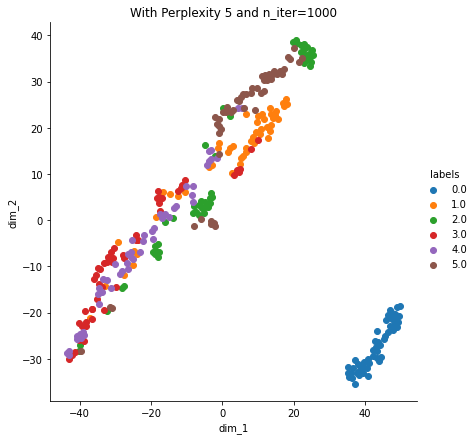

In [10]:
temp_data = data.drop(['condition '], axis = 1)
tsne_df = return_TSNE_data(temp_data, labels)

sns.FacetGrid(tsne_df, hue='labels', size=6).map(plt.scatter, 'dim_1', 'dim_2').add_legend()
plt.title('With Perplexity 5 and n_iter=1000')
plt.show()

**From the above figure, we can see that the 0th Class is only distinctively separable from others based on the data that we have collected. I ahve tried different combinations of TSNE parameters and only class A i.e. the 0th class shown above is distinctively separated from the total given classes**

In [11]:
# now we will split the data into X and Y
X = data.drop(['condition '], axis = 1)
Y = data['condition ']

print(type(X), type(Y))
print(X.shape, Y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(300, 17) (300,)


In [12]:
X.columns

Index(['Mean ', 'SD', 'Variance', 'Kurtosis', 'Median', 'Mode', 'sum',
       'Skewness ', 'max', 'min', 'range', 'RMS', ' Impulse Factor',
       'Shape factor', 'k factor', 'Std error', 'count'],
      dtype='object')

In [13]:
'''
to remove the count column as it has a single value
'''
X = X.drop(['count'], axis = 1)
print(X.shape)

(300, 16)


In [14]:
# to split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.166, stratify = Y, random_state = 42)

print(type(X_train), type(Y_train))
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(250, 16) (50, 16)
(250,) (50,)


In [15]:
'''
To transform the output data labels
'''
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.transform(Y_test)

print(type(Y_test))
print(Y_test)

<class 'numpy.ndarray'>
[5 4 4 0 0 1 0 0 5 2 4 2 1 3 4 3 0 0 1 1 3 5 1 0 3 5 3 1 3 5 0 4 2 5 2 4 2
 2 3 4 3 5 1 1 4 5 2 2 3 4]


In [16]:
'''
I will now make use of Recursive Feature elimination in order to extract the best features. The estimator that I am going to use are
Decision Trees. The reason behind using Decision Trees as the estimators is that, the number of data points and the data features are
less comparatively. So decision trees is the best option to look for redundant data and remove that
'''
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(max_depth = 8, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto')

decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
from sklearn.metrics import accuracy_score

predicted_output = decision_tree_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, predicted_output)

print("The accuracy of the Decision Tree classifier is:- ", accuracy)

The accuracy of the Decision Tree classifier is:-  0.84


In [18]:
'''
To use RECURSIVE FEATURE ELIMINATION CROSS VALIDATION to select the most useful features using decision Tree classifier as the 
estimator
'''
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

estimator_decision_tree_classifier = DecisionTreeClassifier(max_depth = 8, min_samples_split = 2, min_samples_leaf = 1, 
                                                            max_features = 'auto')

stratified_kfold_splitter = StratifiedKFold(10)

feature_selector = RFECV(estimator_decision_tree_classifier, step = 1, min_features_to_select = 5, n_jobs=-1, 
                         cv = stratified_kfold_splitter, scoring = 'accuracy', verbose = 1)

feature_selector.fit(X_train, Y_train)

Fitting estimator with 16 features.
Fitting estimator with 15 features.


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=8,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'),
      min_features_to_select=5, n_jobs=-1, scoring='accuracy', step=1,
      verbose=1)

In [19]:
feature_selector.n_features_

14

In [20]:
ranking = feature_selector.ranking_
ranking

array([1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
all_column_names = X.columns
all_column_names

Index(['Mean ', 'SD', 'Variance', 'Kurtosis', 'Median', 'Mode', 'sum',
       'Skewness ', 'max', 'min', 'range', 'RMS', ' Impulse Factor',
       'Shape factor', 'k factor', 'Std error'],
      dtype='object')

In [25]:
# to iterate through the rankings and extract the column names
column_names_13 = []

for i in range(len(ranking)):
  if ranking[i] == 1:
    column_names_13.append(all_column_names[i])

print(column_names_13)

['Mean ', 'Variance', 'Kurtosis', 'sum', 'Skewness ', 'min', 'range', 'RMS', 'Shape factor', 'k factor', 'Std error']


**The best features that I got after RFECV are ['Mean ', 'SD', 'Variance', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min', 'range', 'RMS', 'Shape factor', 'k factor', 'Std error']**

**Making use of these 13 features to determine the accuracy of the Decision Trees**

In [21]:
X_train_13 = X_train[['Mean ', 'SD', 'Variance', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min', 'range', 'RMS', 'Shape factor', 'k factor', 'Std error']]
X_test_13 = X_test[['Mean ', 'SD', 'Variance', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min', 'range', 'RMS', 'Shape factor', 'k factor', 'Std error']]

print(X_train_13.shape, X_test_13.shape)

# to check the performance of DT on this data
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(max_depth = 8, min_samples_split = 2, min_samples_leaf = 2, max_features = 'auto')

decision_tree_classifier.fit(X_train_13, Y_train)

predicted_output = decision_tree_classifier.predict(X_test_13)

accuracy = accuracy_score(Y_test, predicted_output)

print("The accuracy of the Decision Tree classifier is:- ", accuracy)

(250, 13) (50, 13)
The accuracy of the Decision Tree classifier is:-  0.8


In [22]:
from sklearn.svm import SVC

svm_clf = SVC(kernel = 'rbf', gamma = 0.022721, C = 41.13)
svm_clf.fit(X_train_13, Y_train)

predicted_output = svm_clf.predict(X_test_13)

accuracy = accuracy_score(Y_test, predicted_output)

print("The accuracy of the SVM Classifier is:- ", accuracy)

The accuracy of the SVM Classifier is:-  0.82


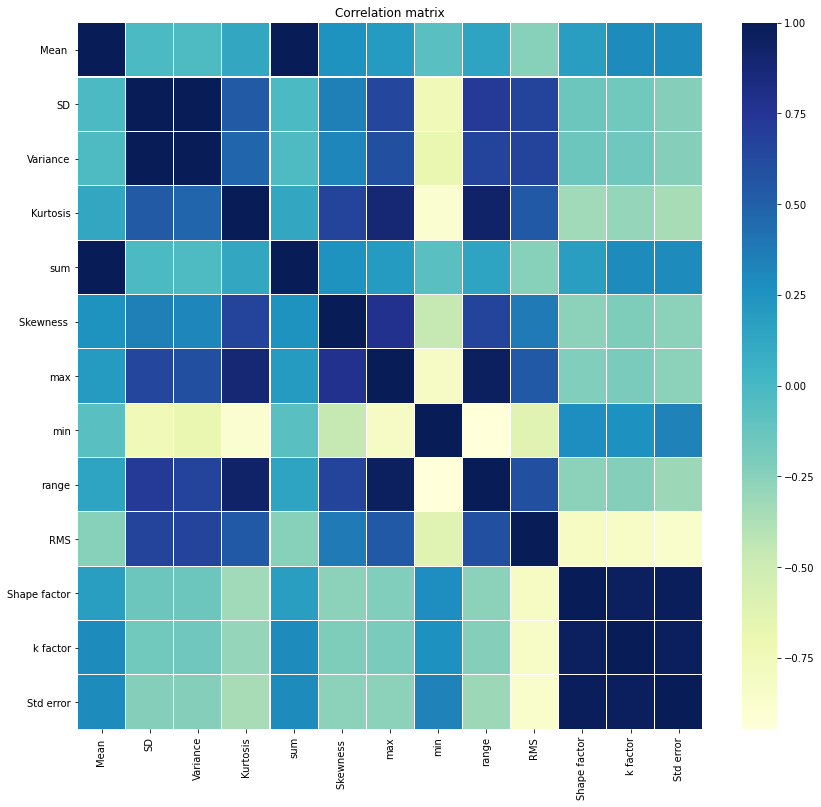

In [23]:
'''
To check the correlation between the top 13 selected features
'''
correlation_matrix_for_13_features = X_train_13.corr()

f, ax = plt.subplots(figsize =(14, 13))

plt.title('Correlation matrix')

sns.heatmap(correlation_matrix_for_13_features, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [24]:
X_train_13.columns

Index(['Mean ', 'SD', 'Variance', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min',
       'range', 'RMS', 'Shape factor', 'k factor', 'Std error'],
      dtype='object')

In [25]:
X_train_new = X_train_13.drop(['k factor', 'Std error'], axis = 1)
X_test_new = X_test_13.drop(['k factor', 'Std error'], axis = 1)

print(type(X_train_new), X_train_new.shape)
print(type(X_test_new), X_test_new.shape)

<class 'pandas.core.frame.DataFrame'> (250, 11)
<class 'pandas.core.frame.DataFrame'> (50, 11)


In [26]:
X_train_new.columns

Index(['Mean ', 'SD', 'Variance', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min',
       'range', 'RMS', 'Shape factor'],
      dtype='object')

(250, 3) <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


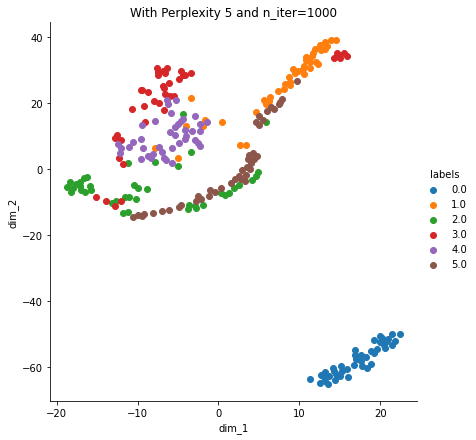

In [27]:
tsne_df = return_TSNE_data(X_train_new, Y_train)

sns.FacetGrid(tsne_df, hue='labels', size=6).map(plt.scatter, 'dim_1', 'dim_2').add_legend()
plt.title('With Perplexity 5 and n_iter=1000')
plt.show()

**So from the above TSNE plot we can clearly see that, by using RFECV, using Correlation matrix and data standardization we are now very well able to distinguish different datapoints**

# KEY ELEMENTS BEFORE OPTIMIZING THE MODEL PARAMETERS

I found out 13 features to be very useful using RFECV viz (['Mean ', 'SD', 'Variance', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min','range', 'RMS', 'Shape factor', 'k factor', 'Std error']). 

I plotted a correlation matrix in order to analyse these datapoints and found out that ["Shape factor", "k factor", "Std error"], these features are highly positively correlated with each other. This can lead to overfitting as a slight exception in one of the feature will lead to distoring of the remaining to features. And so to avoid this, I removed ["k factor", "std error"]. Now I have 11 features left with me viz. **(['Mean ', 'SD', 'Variance', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min','range', 'RMS', 'Shape factor']).**

The TSNE plot shown above using this data is quite good and we can distinctively classify most of the datapoints. 

Before passing the data to the model, I standarized that data as a couple of features had higher ranges and this was hindering the model from having a high Cross Validation Accuracy. 

In [28]:
'''
to define certain parameters before writing the optimization code
'''


def initialize_population_locations():

    # to store the regularization and gamma (the parameters of SVM)
    parameters_list = []

    total_population = 30
    number_of_clans = 6
    population_in_each_clan = (total_population)/(number_of_clans)


    # to randomly initialize the regularization parameter and gamma values such that we have 50 of them
    reg_parameter = np.random.uniform(low = 0, high = 500, size = total_population)
    gamma = np.random.uniform(low = 0, high = 50, size = total_population)

    for i,j in zip(reg_parameter, gamma):
    parameters_list.append([round(i, 5),round(j, 5)])


    return total_population, number_of_clans, population_in_each_clan, parameters_list

In [29]:
'''
to create a function which takes in the input parameters, data and returns the FITNESS of the parameters by calculating the accuracy
using K-Fold CV
'''


def fitness_calculation(parameters, X, Y):

    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import KFold

    # to create a list which will store the accuracy of all the elephants i.e. SVM parameters
    accuracy_list = []

    # to reset the index of the data which is passed to the function
    X = X.reset_index(drop=True)

    # to store the final accuracy for each parameter i.e. the elephant
    final_accuracy = []

    '''
    so now, my training data which is of the size (100,4) will be split into 10 folds, where everytime it will be validated on each fold
    and trained on the remaining 9 folds. 
    ''' 
    kf = KFold(n_splits = 10, random_state = None, shuffle = False)

    for i in range(len(parameters)):

    total_score = 0

    for train_index, test_index in kf.split(X):

        X_train_fold, X_cv_fold = X.iloc[train_index], X.iloc[test_index]
        Y_train_fold, Y_cv_fold = Y[train_index], Y[test_index]

        # now to use this data to train the model and store the validation accuracy for every fold
        svm_model = SVC(C = parameters[i][0], kernel='rbf', gamma = parameters[i][1], verbose = False)
        svm_model.fit(X_train_fold, Y_train_fold)

        predicted_value = svm_model.predict(X_cv_fold)
        score = accuracy_score(Y_cv_fold, predicted_value)

        total_score = total_score + score

    final_accuracy.append(total_score/10)

    return final_accuracy

In [30]:
'''
To create function which will take in parameters and the accuracies as the input and will return the sorted order as the output. Here
I will also consider the number of clans and divide the number of elephants into those clans after sorting them. 
'''


def sort_elephants(accuracies, parameters):

    accuracy_index_dict = dict()

    for i in range(len(accuracies)):
    accuracy_index_dict[i] = accuracies[i]

    # to sort the elements stored in the accuray_index_dict. We are using reverse = TRUE
    sorted_accuracy_index_dict = {k:v for k,v in sorted(accuracy_index_dict.items(), key = lambda item : item[1], reverse = True)}

    '''
    now to take the sorted_accuracy_index_dict, extract the index values and the corrresponding parameters fitness, store them in a list 
    and then divide it into 6 parts
    '''
    # first to extract the keys from the sorted dictionary and index the parameters accordingly
    keys = sorted_accuracy_index_dict.keys()

    sorted_parameters = []

    for i in keys:
    sorted_parameters.append(parameters[i])

    # to convert the list into a numpy array so that we can divide the array into 6 parts. The output that we get is an array of arrays
    splitted_array = np.array_split(sorted_parameters, 6)

    return splitted_array

In [31]:
'''
THIS FUNCTION CONTAINS THE ENTIRE PIPELINE (I.E. WORKFLOW OF EHO). All the definitions are called in this function and the 
CLAN UPDATING AND SEPRARTING OPERATOR are used here. The equivalent terminologies are as follows:-
'''


def EHO(epochs, X_train, Y_train):

  # to initialize the elephant population i.e. to initialize the SVM parameters
  total_population, number_of_clans, population_in_each_clan, parameters_list = initialize_population_locations()
  #print("Population in each clan is:- ", population_in_each_clan)

  # to evaluate the fitness of these SVM parameters i.e. to evaluate the elephant fitness
  final_accuracies = fitness_calculation(parameters_list, X_train, Y_train)

  # to store the maximum accuracy that I got after every epoch i.e. the elephant generation
  best_accuracy_after_every_epoch  = []

  # to store the parameters that I got after every epoch i.e. elephant generation that gave the maximum accuracy
  best_parameter_after_every_epoch = []


  for i in range(epochs):

    new_parameters_list = []

    # to sort the initial parameters i.e. the rearrange the elephant positions according to their fitness
    sorted_elephants_in_clans = sort_elephants(final_accuracies, parameters_list)

    '''
    After sorting the all the SVM parameters (elephants) according to their fitness, I am applying the clan updating operator.
    The clan operating operator depends upon the matriarch which is nothing but the fittest elephant in that particular clan.
    So I will select the first element of every clan and treat it as the MATRIARCH; as they are sorted
    '''
    for clan_number in range(len(sorted_elephants_in_clans)):

        
      sum_of_parameters = 0


      for elephant_number in range(len(sorted_elephants_in_clans[clan_number])):
        # the uniform distribution "r" value to be used in the CLAN UPDATING OPERATOR
        r = np.random.uniform(low = 0, high = 1)
        #r = 0.5

        # the uniform distribution "rand" value which is going to be used in the SEPARATING OPERATOR
        rand = np.random.uniform(low = 0, high = 1)
        #rand = 0.5

        # this determines the influence of the best elephant to the elephants in the clan
        #alpha = np.random.uniform(low = 0, high = 1)
        alpha = 0.5

        # this determines the factor that influences the x_center
        #beta = np.random.uniform(low = 0, high = 1)
        beta = 0.5


        if elephant_number == 0:
          '''
          this is to just assign the MATRIARCH in order to update the position of the rest of the elephants
          '''
          MATRIARCH = sorted_elephants_in_clans[clan_number][elephant_number]
          #print("MATRIARCH:- ", MATRIARCH)


        if elephant_number != 0 and elephant_number != population_in_each_clan - 1:
          '''
          the formula written below is for the CLAN UPDATING OPERATOR
          '''
          # to extract the original parameters i.e. the initial elephant
          X_original = sorted_elephants_in_clans[clan_number][elephant_number]
          #print("ORIGINAL DATAPOINT:- ", X_original)

          X_new = X_original + alpha * (MATRIARCH - X_original) * r
          #print("New datapoint:- ", X_new)

          new_parameters_list.append(X_new)


        if elephant_number == 0:
          '''
          to calculate the X_centre i.e. the determine the centre of each clan. This is a part of CLAN UPDATING OPERATOR
          '''
          for i in sorted_elephants_in_clans[clan_number]:
            sum_of_parameters = sum_of_parameters + i

          X_centre = (sum_of_parameters) / (population_in_each_clan)
          X_new = beta * X_centre

          new_parameters_list.append(X_new)

        
        if elephant_number == population_in_each_clan - 1:
          '''
          to apply the CLAN SEPARATING OPERATOR as this is the worst elephant in the clan
          '''
          # to extract the minimum value or the lower bound and the upper bound to the regularization parameter i.e. C
          X_new_0_min = min(x[0] for x in parameters_list)
          X_new_0_max = max(x[0] for x in parameters_list)

          # to extract the minimum value i.e. the lower bound and the upper bound to the gamma parameter
          X_new_1_min = min(x[1] for x in parameters_list)
          X_new_1_max = max(x[1] for x in parameters_list)


          # to use the SEPARATING OPREATOR FORMULA to reset REGULARIZATION PARAMETER
          new_reg_parameter = X_new_0_min + (X_new_0_max - X_new_0_min + 1) * rand

          # to use the SEPARATING OPERATOR to reset the GAMMA PARAMETER
          new_gamma_parameter = X_new_1_min + (X_new_1_max - X_new_1_min + 1) * rand

          X_new = [new_reg_parameter, new_gamma_parameter]
          X_new = np.array(X_new)

          new_parameters_list.append(X_new)

      #print("=================================END OF CLAN===================================")


    '''
    to assign the new parameters found by using the CLAN UPDATING AND THE CLAN SEPARATING OPERATOR to the "parameters_list" variable
    '''
    parameters_list = new_parameters_list

    #print("The updated parameters list is:- ", parameters_list)

    '''
    considering the new parameters and finding out the fitness value of these newly formed parameters
    '''
    new_accuracies = fitness_calculation(parameters_list, X_train, Y_train)

    # to extract the maximum accuracy and the correspodning index value. After that, to use this index value to extract the corresponding parameters.
    best_accuracy_after_every_epoch.append(max(new_accuracies))

    index_value = new_accuracies.index(max(new_accuracies))

    best_parameter_after_every_epoch.append(parameters_list[index_value])

    # to assign the "new_accuracies" to the "final_accuracies" so that I can pass it to the "SORT_ELEPHANTS" function in the next epoch i.e. next generation
    final_accuracies = new_accuracies

    print('FINAL ACCURACY IS: ', final_accuracies)
    print("BEST PARAMETER IS: ", parameters_list[index_value])
    print("THE BEST ACCURACY IS: ", max(new_accuracies))
    print("="*80)

    #break;


In [32]:
'''
to standardize the data before passing it to the models
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_new_standardized = scaler.fit_transform(X_train_new)
X_test_new_standardized = scaler.transform(X_test_new)

X_train_new_standardized = pd.DataFrame(X_train_new_standardized)
X_test_new_standardized = pd.DataFrame(X_test_new_standardized)

print(type(X_train_new_standardized), X_train_new_standardized.shape)
print(type(X_test_new_standardized), X_test_new_standardized.shape)

<class 'pandas.core.frame.DataFrame'> (250, 11)
<class 'pandas.core.frame.DataFrame'> (50, 11)


In [33]:
X_train_new_standardized.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.166491,-0.641888,-0.610619,-0.631950,-1.166651,0.326382,-0.407618,1.058829,-0.740012,0.033720,-0.413015
1,0.389329,0.830822,0.694004,1.604929,0.389247,0.082017,1.090784,-1.204128,1.196487,0.744678,-0.432032
2,1.439655,-0.488640,-0.493056,0.576646,1.439758,1.949726,0.773832,0.418404,0.236606,0.108506,-0.619835
3,-0.641116,-0.718663,-0.667931,-0.972769,-0.641185,-0.538460,-1.190899,0.873037,-1.093864,-0.003179,-0.486737
4,0.658361,-0.764562,-0.701685,-0.388668,0.658378,-0.370158,-0.387232,-0.437583,-0.008617,-0.024884,-0.598013


In [43]:
EHO(50, X_train_new_standardized, Y_train)

FINAL ACCURACY IS:  [0.828, 0.7479999999999999, 0.6240000000000001, 0.72, 0.27599999999999997, 0.6519999999999999, 0.476, 0.476, 0.43200000000000005, 0.484, 0.492, 0.352, 0.304, 0.24400000000000005, 0.26799999999999996, 0.3, 0.18799999999999994, 0.18799999999999994, 0.18799999999999994, 0.24000000000000005, 0.26399999999999996, 0.176, 0.176, 0.15999999999999998, 0.21599999999999997, 0.22399999999999998, 0.14, 0.14, 0.13600000000000004, 0.564]
BEST PARAMETER IS:  [144.193097   2.719282]
THE BEST ACCURACY IS:  0.828
FINAL ACCURACY IS:  [0.8320000000000001, 0.7719999999999999, 0.7679999999999999, 0.704, 0.20799999999999996, 0.72, 0.5119999999999999, 0.492, 0.4800000000000001, 0.21599999999999997, 0.5559999999999999, 0.352, 0.33199999999999996, 0.36, 0.23600000000000004, 0.45599999999999985, 0.26399999999999996, 0.25600000000000006, 0.25600000000000006, 0.13600000000000004, 0.304, 0.20399999999999996, 0.18799999999999994, 0.20399999999999996, 0.42799999999999994, 0.24800000000000005, 0.163

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

'''
[1.24883548, 0.16947945]  --> (Testing = 0.86, Training = 0.964) --> (top priority as it gave 94.8% accuracy in 10 fold CV)

[144.193097,   2.719282] --> (Testing = 0.8, Training = 1) --> (Starting parameters, HIGHLY OVERFITTING)

[1.83863076, 0.35547253] --> (Testing = 0.86, Training = 0.976) --> (2nd best priority as it gave 94% accuracy in 10 fold CV)

[1.12409709, 0.13139787] --> (Testing = 0.88, Training = 0.964) --> (top priority as it gave 94.4% accuracy in 10 fold CV)
'''

clf = SVC(kernel = 'rbf', C = 1.12409709, gamma = 0.13139787, verbose = 1)
clf.fit(X_train_new_standardized, Y_train)

test_predicted_output = clf.predict(X_test_new_standardized)
train_predicted_output = clf.predict(X_train_new_standardized)

testing_accuracy = accuracy_score(Y_test, test_predicted_output)
training_accuracy = accuracy_score(Y_train, train_predicted_output)

print("The TESTING ACCURACY IS:- ", testing_accuracy)
print('The TRAINING ACCURACY IS:- ', training_accuracy)

[LibSVM]The TESTING ACCURACY IS:-  0.88
The TRAINING ACCURACY IS:-  0.964


In [41]:
def plot_confusion_matrix(test_y, predict_y):

    from sklearn.metrics import confusion_matrix

    C = confusion_matrix(test_y, predict_y)

    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100, '%')


    labels = [0,1,2,3,4,5]
    cmap=sns.light_palette("green")

    '''
    CONFUSION MATRIX
    '''
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Number of misclassified points  3.5999999999999996 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


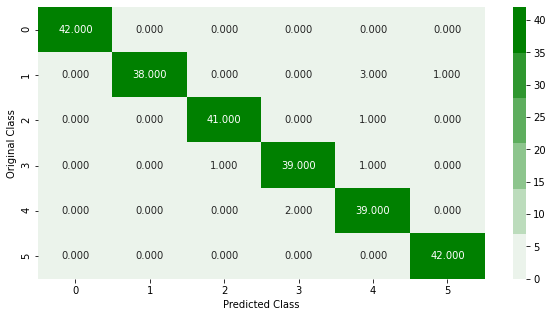

In [42]:
'''
FOR TRAINING DATA POINTS
'''
plot_confusion_matrix(Y_train, train_predicted_output)

Number of misclassified points  12.0 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


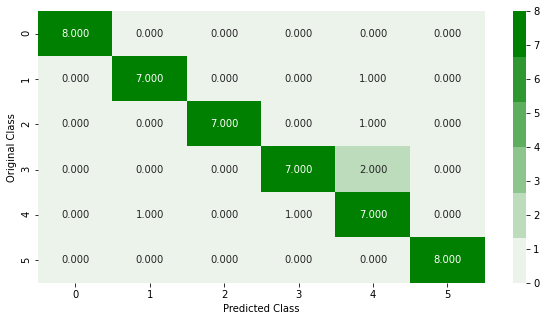

In [43]:
'''
FOR TESTING DATA POINTS
'''
plot_confusion_matrix(Y_test, test_predicted_output)